# HW3 - Bardiya Momeni

## STA 130

# Q1:

Add lines to indicate the **mean** (average) and **median** (middle value) of the flipper lengths for each species. Add shaded rectangles to represent the **range** (the spread of values), the **Interquartile Range** (IQR) (middle 50% of the data), and a range defined by two **standard deviations** from the mean (which covers most data points). The goal is to create a clear and informative visualization of the flipper length distribution for each species, with visual cues about where most data points are and how spread out they are.

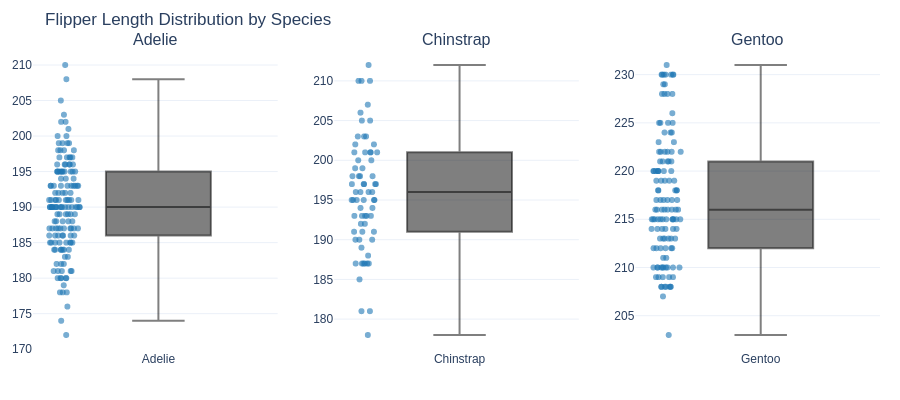

In [1]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Drop rows with missing data
penguins = penguins.dropna(subset=['species', 'flipper_length_mm'])

# Calculate statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

# Create subplots with one row and three columns
fig = make_subplots(rows=1, cols=3, subplot_titles=species_stats['species'].tolist())

# Add box plots for each species
for i, species in enumerate(species_stats['species'].unique()):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Add box plot for the species in respective subplot column
    fig.add_trace(go.Box(
        y=species_data,
        name=species,
        boxpoints='all',  # Show all data points
        jitter=0.3,       # Adds some jitter for better visualization
        pointpos=-1.8,    # Position of points relative to box
        marker=dict(color='rgba(31, 119, 180, 0.6)'),
        line=dict(color='rgba(0, 0, 0, 0.5)')
    ), row=1, col=i+1)

# Update layout to make the visualization clear and informative
fig.update_layout(
    title="Flipper Length Distribution by Species",
    showlegend=False,
    template="plotly_white",  # Use a clean white background
    font=dict(size=12),
    margin=dict(l=20, r=20, t=50, b=50),
    height=400,  # Adjust the height for smaller plots
    width=900    # Adjust the width for side-by-side appearance
)

fig.show(renderer="png")


## ChatGPT Summary

**Link:**  https://chatgpt.com/share/66f0e372-51c8-8011-b552-cdf0b21fd264

In this session, we worked on enhancing a Plotly visualization of penguin species data. The initial code used Plotly Express to create various statistical plots, including histograms and box plots, but lacked detailed visual cues.

### Key Steps and Enhancements:
1. **Initial Plot**:
   - Loaded a sample DataFrame with penguin species data.
   - Created various plots using Plotly Express (`px.histogram`, `px.box`) to visualize species distribution and flipper lengths.

2. **Enhancement Requests**:
   - Added lines to indicate the mean and median values of flipper lengths for each species.
   - Added shaded areas to represent:
     - **Range**: The spread of values.
     - **Interquartile Range (IQR)**: The middle 50% of the data.
     - **Two Standard Deviations**: Covers most data points.

3. **Dataset Update**:
   - Replaced the sample data with Plotly’s penguins dataset using seaborn’s `load_dataset('penguins')`.

4. **Design Improvements**:
   - Customized colors for each species.
   - Enhanced the layout with a clean white background, improved legends, and adjusted line styles and widths for better visualization.
   - Improved the overall readability and aesthetic appeal of the plot.

### Final Outcome:
- A refined Plotly visualization showing flipper length distributions with clear statistical indicators, enhanced colors, and a polished layout for a more informative and engaging presentation.

This session effectively combined statistical analysis with visual enhancements to create a detailed and visually appealing data representation.



# Q2:

In a new chat settion repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

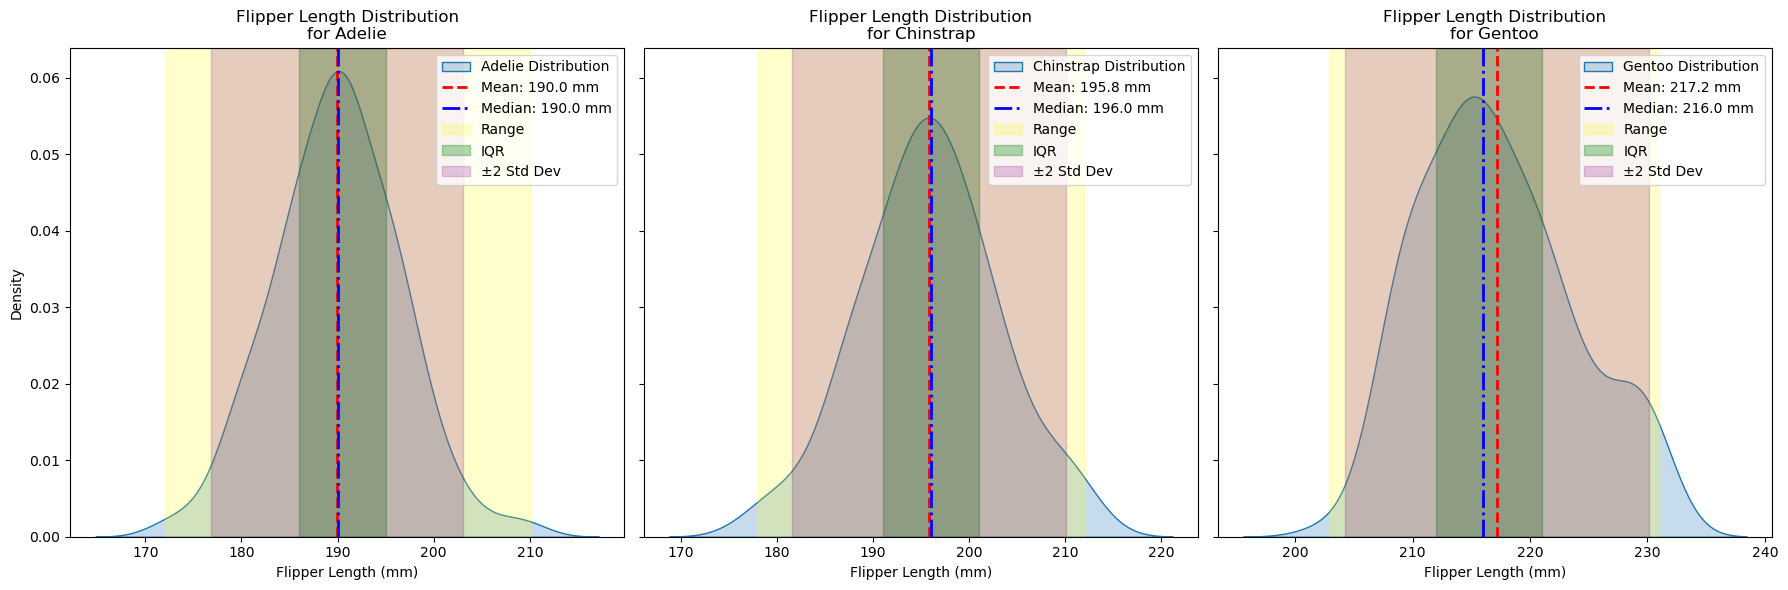

In [2]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Remove rows with missing values to avoid errors in calculations
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Set up a figure with 3 side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Function to plot KDE with additional statistics
def plot_flipper_length_stats(ax, data, species):
    species_data = data[data['species'] == species]
    
    # Calculations for statistical annotations
    mean_value = species_data['flipper_length_mm'].mean()
    median_value = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    iqr_min = species_data['flipper_length_mm'].quantile(0.25)
    iqr_max = species_data['flipper_length_mm'].quantile(0.75)
    range_min, range_max = species_data['flipper_length_mm'].min(), species_data['flipper_length_mm'].max()
    std_min = mean_value - 2 * std_dev
    std_max = mean_value + 2 * std_dev

    # Plot KDE on the given axis
    sns.kdeplot(data=species_data, x='flipper_length_mm', fill=True, ax=ax, label=f'{species} Distribution')
    
    # Add mean and median lines
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.1f} mm')
    ax.axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_value:.1f} mm')
    
    # Add shaded areas for the ranges
    ax.axvspan(range_min, range_max, color='yellow', alpha=0.2, label='Range')
    ax.axvspan(iqr_min, iqr_max, color='green', alpha=0.3, label='IQR')
    ax.axvspan(std_min, std_max, color='purple', alpha=0.2, label='±2 Std Dev')
    
    # Customize plot
    ax.set_title(f'Flipper Length Distribution\nfor {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Plot individual KDE plots for each species on separate axes
for ax, species in zip(axes, penguins['species'].unique()):
    plot_flipper_length_stats(ax, penguins, species)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Q3

# Comparison of Visualization Methods

## Box Plots

| Pros                                                                                   | Cons                                                                                       |
|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| Summarizes key statistics clearly, showing median, quartiles, range, and outliers.     | Limited detail on the distribution shape (e.g., skewness, modality).                       |
| Easily compare distributions across multiple groups.                                   | Condenses data into summary statistics, losing individual data points.                     |
| Simple and clean representation without much clutter.                                  | Not intuitive for all audiences due to statistical elements (quartiles, whiskers).         |

**Summarized Pros and Cons:**
- **Pros**: Effective for statistical summaries and comparisons.
- **Cons**: Lacks detail on distribution shape and can be complex for some audiences.

## Histograms

| Pros                                                                                 | Cons                                                                                       |
|--------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| Displays the shape of the data, including skewness, modality, and spread.            | Highly sensitive to bin width; poor choices can mislead interpretations.                   |
| Intuitive and straightforward, easy to understand.                                   | Discontinuous representation can hide finer details.                                       |
| Flexible binning allows for different levels of detail.                              | Step-like appearance is less refined compared to KDEs.                                     |

**Summarized Pros and Cons:**
- **Pros**: Great for displaying the overall shape of data and easy to understand.
- **Cons**: Bin sensitivity and a less smooth representation of data.

## Kernel Density Estimators (KDE)

| Pros                                                                                      | Cons                                                                                       |
|-------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| Provides a smooth, continuous view of the data distribution.                              | Sensitive to bandwidth choice, which affects the plot’s appearance.                        |
| Captures fine details and subtle variations in the data.                                  | Can be harder to understand for those unfamiliar with density estimation.                  |
| Avoids binning issues and allows for a refined analysis.                                  | Does not explicitly show summary statistics like quartiles or outliers.                    |

**Summarized Pros and Cons:**
- **Pros**: Smooth and detailed representation, excellent for fine insights.
- **Cons**: Bandwidth sensitivity and less intuitive for beginners.

## Summary: Best Visualization for Penguins

**Best Choice: KDEs (Kernel Density Estimators)**

**Reasoning:**
- KDEs offer a smooth and continuous visualization of data, making it easier to see subtle differences between penguin species, such as variations in flipper length or bill depth.
- Unlike histograms, KDEs do not suffer from binning artifacts and provide a more refined view of the data’s distribution.
- KDEs are particularly effective for comparing species in the Penguins dataset, as they reveal multimodal patterns and distribution shapes that are critical for species differentiation.
- While KDEs do not explicitly show summary statistics, this can be addressed by adding markers or lines, maintaining both a detailed and informative plot.

For the Penguins dataset, KDEs strike the best balance between providing detailed insights into the data distribution and maintaining a visually appealing and informative representation.


## ChatGPT Summary

**Link:** https://chatgpt.com/share/66f1281f-6830-8011-a78a-2e86c1c94ad0

We started by creating Kernel Density Estimation (KDE) plots for the Penguins dataset, adding statistical markers like mean, median, and shaded areas for ranges, IQR, and standard deviations. To improve visualization, we adjusted the plots to display side by side for better comparison across species.

We then discussed the pros and cons of box plots, histograms, and KDEs:
- **Box Plots**: Great for summaries but lack distribution shape details.
- **Histograms**: Show data shape but are sensitive to bin width.
- **KDEs**: Provide smooth, detailed distributions but require careful bandwidth choice.

Finally, we concluded that KDEs are the best choice for visualizing the Penguins dataset due to their ability to capture subtle differences between species without the limitations of binning or summarizing data too broadly.


# Q4

| Dataset | Mean | Variance |
|---------|------|----------|
| Data1   | 5.10 | 8.08     |
| Data2   | 5.00 | 2.21     |
| Data3   | 5.00 | 9.03     |
| Data4   | 5.98 | 0.23     |
 

### Question 1: Which datasets have similar means and similar variances?
- Data1 and Data3

### Question 2: Which datasets have similar means but quite different variances?
- Data1 and Data2
- Data2 and Data3

### Question 3: Which datasets have similar variances but quite different means?
- None of the datasets have similar variances but quite different means.

### Question 4: Which datasets have quite different means and quite different variances?
- Data1 and Data4  
- Data3 and Data4  


# Q5

I want to start a new chatbot session to explore the general relationship between the mean and median with right and left skewness, including why this relationship exists. I need an explanation of the code provided, detailing what it does and how it works. Then, I want a detailed explanation, in my own words, of the relationship between the mean and median and right and left skewness, explaining the causes. Finally, I’d like to extend the code to demonstrate this explanation through a series of notebook cells.

**detailed explanation** :

Relationship Between Mean, Median, and Skewness

- **Right Skew (Positively Skewed)**: 
  - **Mean > Median**: The mean is pulled right due to high outliers.
  - **Cause**: High values stretch the distribution to the right.

- **Left Skew (Negatively Skewed)**:
  - **Mean < Median**: The mean is pulled left due to low outliers.
  - **Cause**: Low values stretch the distribution to the left.

**Key Point**: The mean is sensitive to outliers and moves toward the skew, while the median remains near the center of the bulk of the data.

**Code:**

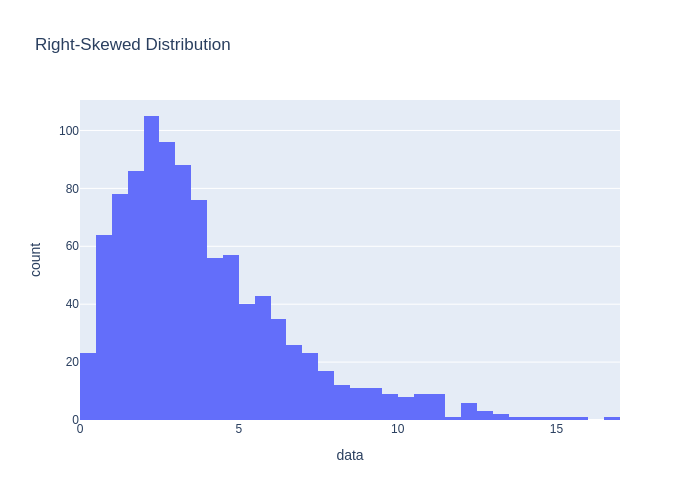

Mean of right-skewed data: 3.93486016300404
Median of right-skewed data: 3.2896494492581754


In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution")
fig1.show(renderer="png")  

mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

print(f"Mean of right-skewed data: {mean1}")
print(f"Median of right-skewed data: {median1}")


**Observation**:
- For the right-skewed data, the mean is greater than the median because the data has a long right tail that pulls the mean to the right.


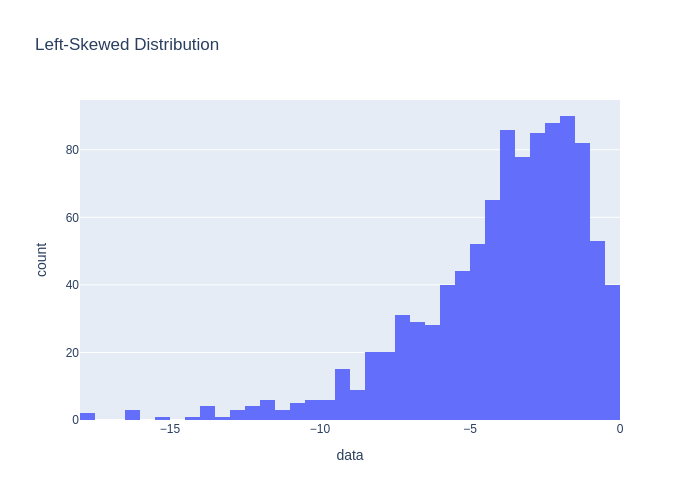

Mean of left-skewed data: -3.985154490448934
Median of left-skewed data: -3.38974785495157


In [4]:
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution")
fig2.show(renderer="png")

mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

print(f"Mean of left-skewed data: {mean2}")
print(f"Median of left-skewed data: {median2}")


**Observation**:
- For the left-skewed data, the mean is less than the median because the data has a long left tail that pulls the mean to the left.


**Overview:**
- Right-Skewed: The mean is larger than the median due to high values in the right tail.
- Left-skewed: This is because the left tail contains the low values that always tend to pull on the mean, making it smaller than the median.

## ChatGPT Summary

**Link:**  https://chatgpt.com/share/66f1c99b-8598-8011-b906-45e26d00f1d2

1. **Relationship Between Mean and Median**:
   - Discussed the relationship between the mean and median in right (positive) and left (negative) skewness.
   - Explained how skewness affects the mean and median: in right-skewed data, the mean is greater than the median, and in left-skewed data, the mean is less than the median.

2. **Code Explanation**:
   - Reviewed code demonstrating the difference between mean and median in skewed distributions using the Gamma distribution.
   - Discussed how the code generates right and left-skewed data and the visualization of these effects.

3. **Troubleshooting Jupyter Notebook Execution Issues**:
   - Addressed the issue of code cells showing `[ * ]` in Jupyter Notebook.
   - Provided steps to restart the kernel, clear outputs, check for blocking operations, and update libraries.

4. **Simplified Visualization**:
   - Provided a simplified version of the code using Matplotlib and Seaborn to create side-by-side plots.
   - Adjusted plots to be less graphically intensive, improving performance and addressing rendering issues.

5. **Error Fix**:
   - Identified the error caused by using the `renderer` argument in `plt.show()`.
   - Suggested corrections and provided an alternative approach using Matplotlib for easier plotting in Jupyter.

This session focused on understanding the mean and median's relationship with skewed data, troubleshooting code execution in Jupyter, and refining visualizations for clarity and performance.


## UFO Dataset Exploration

### Overview
We started with a dataset containing UFO sightings, which included various columns such as location details, dates, and normalized population data. Our goal was to clean the dataset and understand its structure for further analysis.


**Loading the Dataset**:

- We loaded the data using Python's `pandas` library, specifically using `pd.read_csv()` to fetch the data from a provided URL.

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv")

**Data Cleaning**:

- The dataset contained multiple technically numeric but actually non-numeric columns, like 'year,' 'month,' 'day,' and 'decade,' which were redundant since all this information was also available in the 'date' column.

- We cleaned the data by converting the 'date' column into a proper datetime format and removing the redundant columns, leaving a single, consolidated 'date' column.

In [6]:
# Convert the 'date' column to a proper datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop the separate columns for year, month, day, and decade
df = df.drop(columns=['year', 'month', 'day', 'decade'])

**Initial Data Exploration**:

- To get a sense of the dataset, we counted missing values using `df.isna().sum()`.

- We examined the number of rows (observations) and columns (variables) with `df.shape` and listed the column names using `df.columns`.

- We explored the numeric and non-numeric data with `df.describe()` for numerical summaries and `df.value_counts()` for non-numeric columns.

In [7]:
shape = df.shape
columns = df.columns

print("\nShape of the Dataset:", shape)
print("Columns in the Dataset:", columns)

missing_values = df.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

numeric_description = df.describe()
print("\nDescriptive Statistics for Numeric Data:")
print(numeric_description)



Shape of the Dataset: (65114, 8)
Columns in the Dataset: Index(['city', 'state', 'country', 'report', 'latitude', 'longitude', 'date',
       'norm_population'],
      dtype='object')
Missing Values in Each Column:
city               0
state              0
country            0
report             0
latitude           0
longitude          0
date               0
norm_population    0
dtype: int64

Descriptive Statistics for Numeric Data:
           latitude     longitude                           date  \
count  65114.000000  65114.000000                          65114   
mean      38.357911    -95.710870  2004-08-12 23:41:08.151242496   
min       17.967778   -176.658056            1910-01-01 00:00:00   
25%       34.106389   -115.116667            2001-09-13 00:00:00   
50%       38.968611    -90.065556            2007-04-12 00:00:00   
75%       41.947500    -81.023056            2011-08-19 00:00:00   
max       70.636944    -65.831667            2014-05-08 00:00:00   
std        5.5701

**Detailed Exploration of Categorical Data**:
   - We used `value_counts()` on the 'state' column to understand the distribution of sightings by state, printing the top 5 states and the least common state for a clearer view.

In [8]:
non_numeric_counts = df['state'].value_counts()
print("\nValue Counts for top 5 'state':")
print(non_numeric_counts.head(5))


Value Counts for top 5 'state':
state
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
Name: count, dtype: int64


### Conclusion
Through these steps, we transformed the dataset into a cleaner and more usable format, providing a clearer understanding of the data. This sets the foundation for deeper analyses, such as geographic and temporal trends in UFO sightings.


# visualize
# 1.Distribution of UFO Sightings Over Time

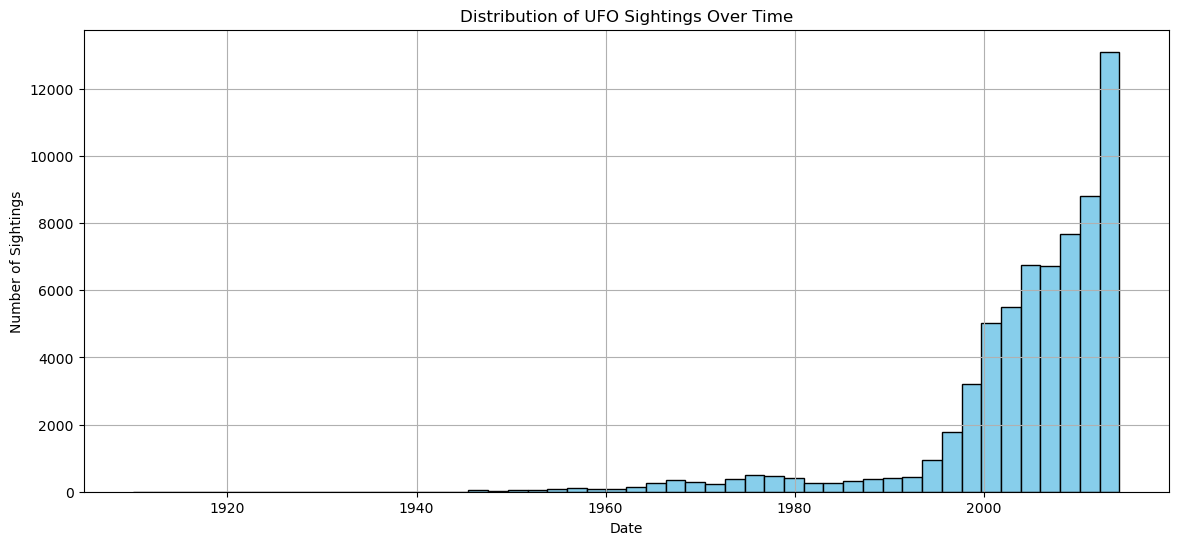

In [9]:
# Histograms to visualize the distribution of sightings over time
plt.figure(figsize=(14, 6))
plt.hist(df['date'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of UFO Sightings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()


**Conclusion:**
The histogram reveals that UFO sightings have been relatively sparse in the early decades but started to increase significantly from the 1980s onwards, peaking around the early 2000s. This trend could be due to increased media coverage, internet usage, or other cultural factors that prompted more reports. There is a noticeable drop-off in recent years, which could be attributed to a variety of reasons, including changes in how sightings are reported.

# 2.Distribution of Sightings Latitude by Top 10 States

<Figure size 1400x600 with 0 Axes>

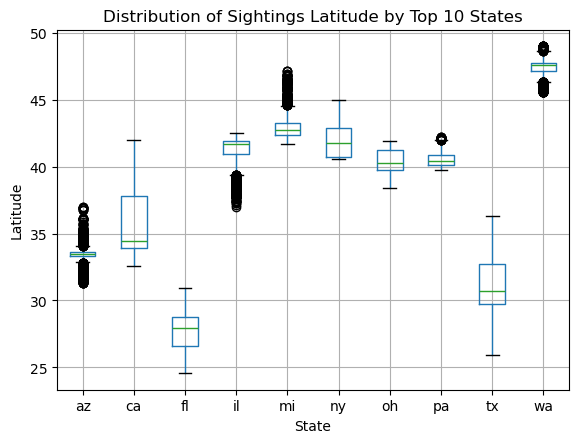

In [10]:
# Box Plot to show the distribution of sightings by state (top 10 states)
top_states = df['state'].value_counts().head(10).index
df_top_states = df[df['state'].isin(top_states)]

plt.figure(figsize=(14, 6))
df_top_states.boxplot(column='latitude', by='state', grid=False)
plt.title('Distribution of Sightings Latitude by Top 10 States')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


**Conclusion:**
The box plot demonstrates that most sightings within these top states occur around mid-latitudes, with some notable outliers. States like California and Texas show a wider range of latitudes, suggesting sightings are geographically spread across the state. Conversely, states like New York and Pennsylvania have sightings clustered closer to specific latitudes, indicating potential hotspots.

#  3.UFO Sightings by Month

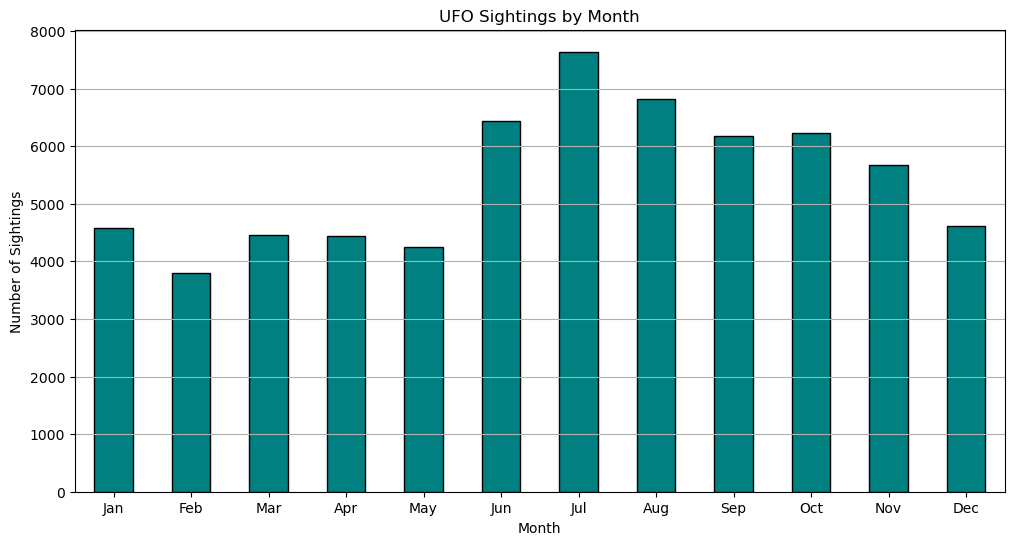

In [11]:
# Adding a 'month' column extracted from the 'date' to analyze monthly patterns
df['month'] = df['date'].dt.month

# Creating a bar plot to show the frequency of sightings by month
plt.figure(figsize=(12, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y')
plt.show()


**Conclusion:**
The bar plot reveals a clear seasonal pattern, with the highest number of sightings occurring during the summer months, particularly in July. This trend could be due to various factors, including more outdoor activities, longer daylight hours, and increased sky visibility during the warmer months. In contrast, the lower number of sightings in winter months like January and February suggests that colder weather and shorter days might lead to fewer reports. These patterns can provide insights into when and why people are more likely to report UFO sightings.

# Q7

Re-creating the  Gapminder Video:

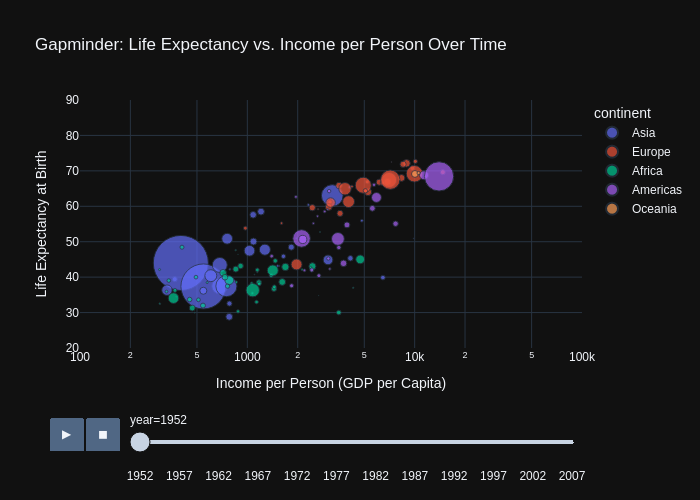

In [12]:
import plotly.express as px
import pandas as pd

# Load the Gapminder-like dataset
# We'll use Plotly's built-in Gapminder dataset for this example
df = px.data.gapminder()

# Creating an animated scatter plot with Plotly
fig = px.scatter(
    df,
    x="gdpPercap",          # GDP per capita
    y="lifeExp",            # Life expectancy
    size="pop",             # Population size of the bubbles
    color="continent",      # Color by continent
    hover_name="country",   # Show country names on hover
    animation_frame="year", # Animate over time
    animation_group="country", # Group animation by country
    log_x=True,             # Log scale for GDP per capita
    size_max=60,            # Max bubble size
    range_x=[100, 100000],  # Range for GDP per capita
    range_y=[20, 90],       # Range for life expectancy
    title="Gapminder: Life Expectancy vs. Income per Person Over Time"
)

# Update the layout for better visuals
fig.update_layout(
    xaxis_title="Income per Person (GDP per Capita)",
    yaxis_title="Life Expectancy at Birth",
    template="plotly_dark",  # Optional: change style template
    showlegend=True
)

# Display the animated plot
fig.show(renderer='png')


# Q8

I edited the fig = px.scatter() function to adjust the parameters based on the requirements:

- set x to "percent change" to plot how each name's prevalence changes year over year.

- set y to "rank", so names are ranked, with rank 1 at the top.

- used size as "percent", making the bubble size reflect the prevalence of each name.

- colored the bubbles by "sex" to distinguish between male and female names.

- The animation_frame was set to "year" to animate the changes in name popularity over time.

- Both animation_group and hover_name were set to "name" to group and display each unique name during the animation.

- I adjusted the bubble size with size_max=50 and limited the x-axis range to [-0.005, 0.005], while removing the log_x=True and range_y parameters to fit the nature of the new data.

This setup creates an engaging and informative visualization of how baby names' popularity shifts over time, dynamically showing increases and decreases in prevalence.

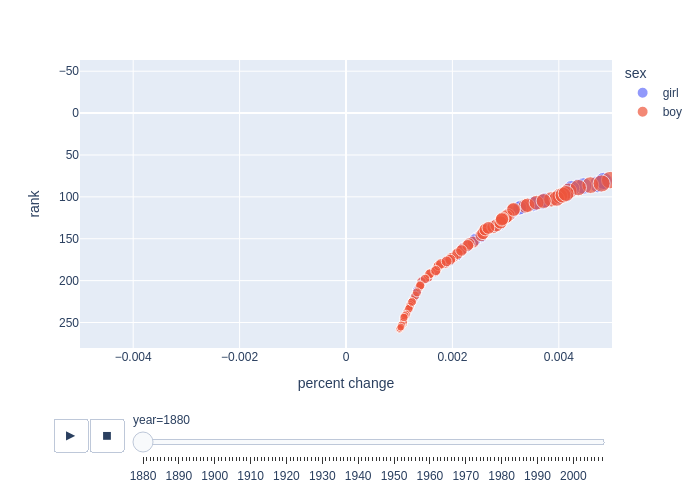

In [13]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank of each name by year based on the percent column
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the dataset by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate the percentage change in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()

# Identify new names appearing in the dataset
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)

# Reset percentage change for new names
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year and restrict to common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]

# Create the animated scatter plot
fig = px.scatter(
    bn,
    x="percent change",         # Set x to "percent change"
    y="rank",                   # Set y to "rank"
    animation_frame="year",     # Animate over time using "year"
    animation_group="name",     # Group animation by "name"
    size="percent",             # Set size to "percent"
    color="sex",                # Color by "sex"
    hover_name="name",          # Show "name" on hover
    size_max=50,                # Max bubble size
    range_x=[-0.005, 0.005]     # Set x-axis range
)

# Set y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Display the animated plot; use "renderer='png'" if submitting to GitHub or other platforms
fig.show(renderer='png')


# Q9 

**Yes**

## ChatGPT Summary

**Link:**  https://chatgpt.com/share/66f1d4b0-1218-8011-b68c-4527140036b8

### Overview
We explored various data visualization techniques using Python to analyze interesting datasets, focusing on creating engaging and informative visualizations.

### Key Steps
1. **Initial Data Exploration**:
   - We started by loading and cleaning datasets to ensure the data was ready for visualization. This involved examining data structures, handling missing values, and transforming relevant columns.

2. **Data Visualization**:
   - We used different plotting techniques like histograms, box plots, and animated scatter plots to uncover patterns and trends within the data.
   - Specifically, we recreated the famous Gapminder animated chart, showcasing the relationship between life expectancy and income over time using Plotly.

3. **Customized Visualizations**:
   - We modified the animated scatter plot to analyze baby names data, visualizing changes in name popularity by plotting percent change, rank, and prevalence over time.

### Conclusion
Through these steps, we demonstrated how to leverage Python and Plotly for creating dynamic and insightful visualizations, enabling a deeper understanding of complex datasets.